In [1]:
import cv2
import os
import glob
import warnings
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import itertools
from sklearn.metrics import confusion_matrix

# Reading in Data

In [2]:
folder_paths = ['Achaemenid architecture','American craftsman style', 'American Foursquare architecture', 'Ancient Egyptian architecture', 'Art Deco architecture']

In [24]:
file_jpg = glob.glob(f'../CSE_404_Project/**/{folder_paths[2]}/*.jpg', recursive=True)

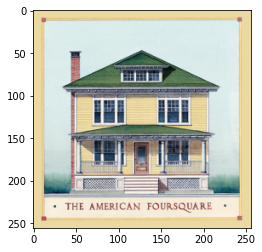

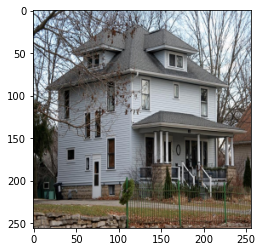

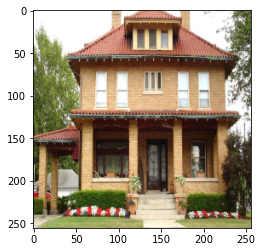

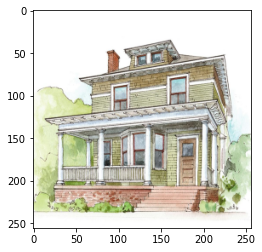

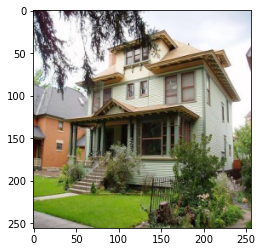

In [25]:
dim = (256,256)

for i, f in enumerate(file_jpg[:5]):
    img = cv2.imread(f)
    img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

In [26]:
X = []
y = []

dim = (256,256)

for folder in folder_paths:
    file_jpg = glob.glob(f'../CSE_404_Project/**/{folder}/*.jpg', recursive=True)

    for i, f in enumerate(file_jpg):
        img = cv2.imread(f)
        img = cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = np.array(img)
        img = img.astype('float32')
        img /= 255 
        X.append(img)
        y.append(folder)

# Splitting Training and Testing Data

In [27]:
y = [folder_paths.index(label) for label in y]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

In [37]:
len(X_train), len(X_test), len(X_valid)

(1164, 364, 292)

# Create and Train Neural Network

In [29]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [256, 256]),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(70, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [30]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

In [31]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_valid = np.asarray(X_valid)
y_valid = np.asarray(y_valid)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [32]:
model_history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 5)

Epoch 1/5
37/37 [==============================] - 15s 397ms/step - loss: 15.6293 - accuracy: 0.2203 - val_loss: 3.7786 - val_accuracy: 0.2979
Epoch 2/5
37/37 [==============================] - 12s 333ms/step - loss: 2.8263 - accuracy: 0.3205 - val_loss: 3.4531 - val_accuracy: 0.2021
Epoch 3/5
37/37 [==============================] - 12s 313ms/step - loss: 2.2900 - accuracy: 0.3938 - val_loss: 2.4577 - val_accuracy: 0.3151
Epoch 4/5
37/37 [==============================] - 11s 306ms/step - loss: 1.9252 - accuracy: 0.4072 - val_loss: 3.7910 - val_accuracy: 0.3151
Epoch 5/5
37/37 [==============================] - 13s 342ms/step - loss: 2.3205 - accuracy: 0.4281 - val_loss: 1.6188 - val_accuracy: 0.3767


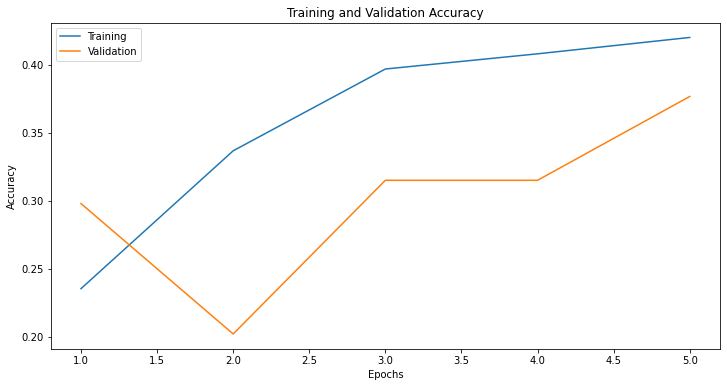

In [33]:
plt.figure(figsize = (12, 6))
train_loss = model_history.history['accuracy']
val_loss = model_history.history['val_accuracy'] 
epoch = range(1, 6)
sns.lineplot(x = epoch, y = train_loss, label = 'Training')
sns.lineplot(x = epoch, y = val_loss, label = 'Validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

In [34]:
y_probs = model.predict(X_test)
y_pred = np.argmax(y_probs, axis=1)

y_pred, y_test

(array([3, 0, 3, 3, 3, 4, 4, 3, 3, 0, 2, 3, 0, 3, 3, 3, 3, 3, 2, 3, 3, 0,
        4, 3, 4, 3, 0, 2, 4, 2, 3, 4, 0, 3, 3, 3, 3, 3, 3, 2, 2, 0, 2, 2,
        2, 4, 4, 3, 2, 3, 0, 1, 3, 3, 4, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3,
        0, 2, 2, 3, 2, 2, 3, 3, 2, 0, 3, 3, 3, 3, 2, 4, 4, 0, 3, 3, 0, 0,
        4, 2, 2, 3, 3, 3, 3, 0, 4, 3, 0, 2, 3, 0, 1, 3, 0, 3, 3, 3, 2, 4,
        2, 4, 2, 0, 0, 3, 2, 2, 0, 3, 4, 3, 4, 0, 3, 3, 3, 3, 3, 2, 3, 4,
        1, 4, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 0, 2, 3, 3, 3, 2, 2, 0, 4, 3,
        0, 3, 3, 4, 3, 0, 3, 3, 3, 3, 3, 0, 4, 3, 3, 3, 3, 1, 3, 4, 3, 2,
        1, 2, 0, 0, 3, 3, 3, 3, 2, 3, 3, 3, 2, 0, 3, 2, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 4, 3, 3, 2, 3, 0, 3, 3, 0, 4, 2, 3,
        3, 2, 3, 3, 3, 2, 0, 3, 0, 0, 3, 3, 2, 0, 2, 4, 2, 2, 2, 3, 0, 0,
        4, 3, 3, 4, 2, 2, 0, 3, 3, 3, 2, 2, 4, 2, 2, 0, 0, 0, 0, 4, 3, 3,
        0, 4, 3, 3, 3, 4, 4, 3, 2, 3, 3, 2, 2, 4, 2, 3, 4, 2, 0, 3, 3, 3,
        3, 3, 3, 2, 4, 3, 3, 0, 3, 3, 

In [35]:
accuracy = np.mean(y_pred == y_test)
accuracy

0.3489010989010989

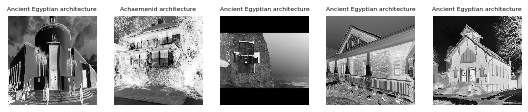

In [36]:
plt.figure(figsize=(9.2, 4.4))
for index, image in enumerate(X_test[:5]):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(folder_paths[y_pred[index]], fontsize=6)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()